### Hogwarts Legacy Reviews - NLP

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('hogwarts_legacy_reviews.csv')

In [3]:
df.head()

,Unnamed: 0,Playtime,Feedback,Review
0,0,16,Positive,Greattt Game!
1,1,26,Positive,9/10Fantastic experience. A true Wizarding Wor...
2,2,29,Positive,worth it
3,3,24,Positive,I've been waiting 84 YEARSSSSSSSS.The game is ...
4,4,7,Positive,very fun game (it is not transphobic at all)


In [4]:
df.isnull().sum()

Unnamed: 0    0
Playtime      0
Feedback      0
Review        1
dtype: int64

In [5]:
df.fillna('Review', inplace=True)

In [6]:
df.isnull().sum()

Unnamed: 0    0
Playtime      0
Feedback      0
Review        0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,Playtime
count,46405.000000,46405.000000
mean,23202.000000,11.478397
std,13396.113958,9.761163
min,0.000000,0.000000
25%,11601.000000,4.000000
50%,23202.000000,9.000000
75%,34803.000000,16.000000
max,46404.000000,122.000000


In [8]:
df=df.drop(columns=['Unnamed: 0'],axis=1)

In [9]:
df.head()

,Playtime,Feedback,Review
0,16,Positive,Greattt Game!
1,26,Positive,9/10Fantastic experience. A true Wizarding Wor...
2,29,Positive,worth it
3,24,Positive,I've been waiting 84 YEARSSSSSSSS.The game is ...
4,7,Positive,very fun game (it is not transphobic at all)


In [10]:
df['Feedback'].value_counts()

Positive    42801
Negative     3604
Name: Feedback, dtype: int64

In [11]:
d={'Negative':0,'Positive':1}

In [12]:
df['Feedback']=df['Feedback'].map(d)

In [13]:
import seaborn as sns

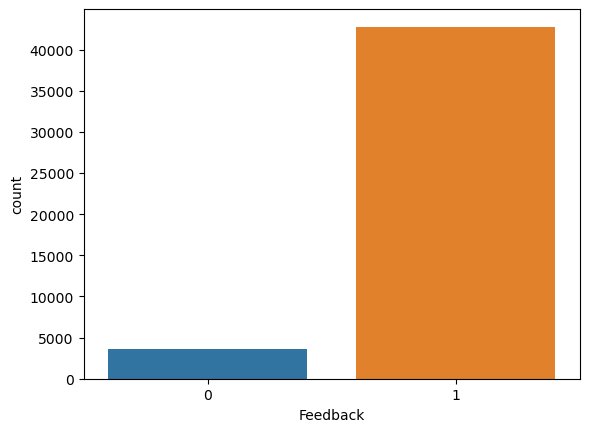

In [14]:
sns.countplot(x=df['Feedback']);

In [15]:
df['Review']=df['Review'].str.lower()
df['Review']=df['Review'].str.replace('[^\w\s]','')
df['Review']=df['Review'].str.replace('\n','')
df['Review']=df['Review'].str.replace('\d+','')
df['Review']=df['Review'].str.replace('\r','')

In [16]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('cloud.png'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [18]:
Negative=df[df['Feedback']==0]['Review']
Positive=df[df['Feedback']==1]['Review']

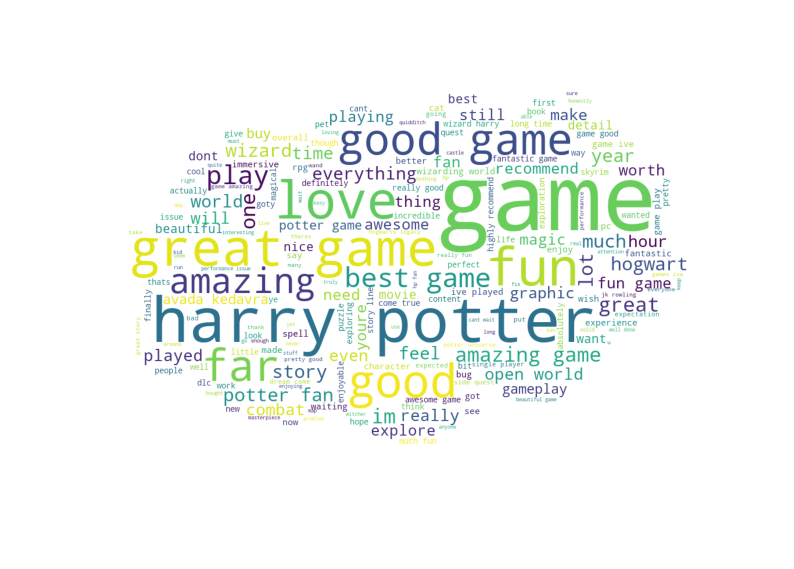

In [19]:
wc(Positive,'white')

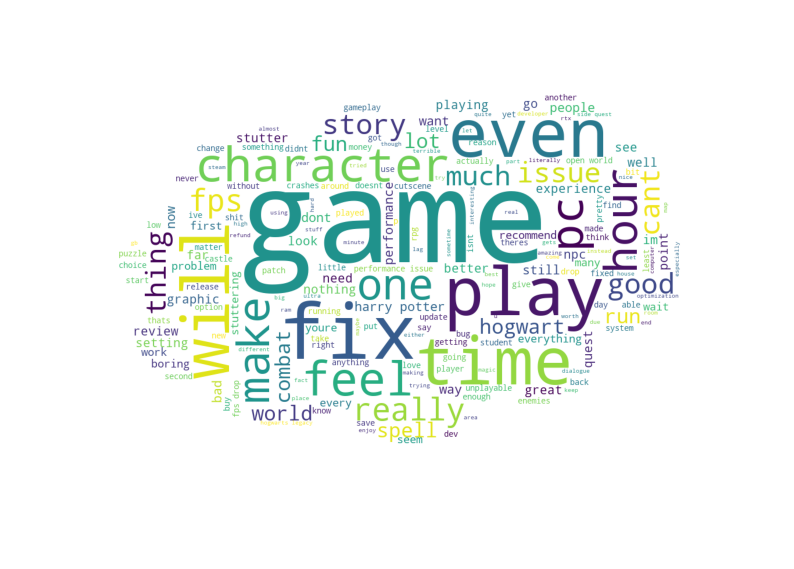

In [20]:
wc(Negative,'white')

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()
nb=MultinomialNB()

In [22]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [23]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),analyzer=lemmafn)

In [24]:
x=df['Review']
y=df['Feedback']

In [25]:
x=vect.fit_transform(x)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [27]:
model=nb.fit(x_train,y_train)

In [28]:
tahmin=model.predict(x_test)

In [29]:
accuracy_score(tahmin,y_test)

0.9487124232302554

In [30]:
tahmin

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

#### Sentimen Analysis

In [31]:
from textblob import TextBlob
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [32]:
df['sentiment']=df['Review'].apply(detect_sentiment)

In [33]:
df.sentiment.value_counts()

 0.000000    9321
 0.300000    2206
-0.400000    1877
 0.200000    1663
 0.500000    1606
             ... 
-0.003699       1
 0.131667       1
 0.039131       1
 0.163333       1
-0.092091       1
Name: sentiment, Length: 6135, dtype: int64

In [34]:
# 0 notr, 1 pozitif, 2 negatif
def sntmnt(score):
    if score>0.2:
        return 1 
    elif score<-0.2:
        return 2
    else:
        return 0

In [35]:
df['Feedback']=df['sentiment'].apply(sntmnt)

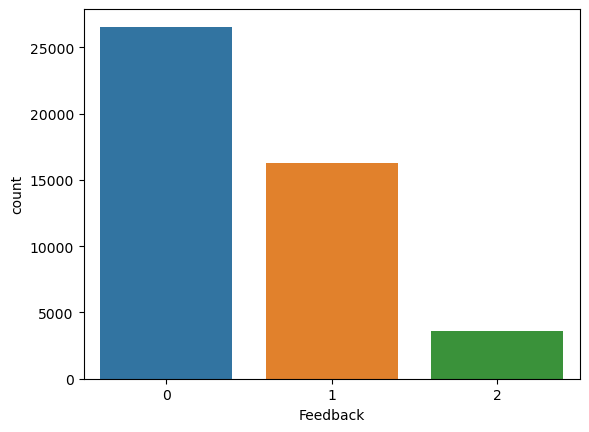

In [36]:
sns.countplot(x=df['Feedback']);

In [37]:
hogwartsbw=df[(df.Feedback==1)|(df.Feedback==5)]

In [38]:
hogwartsbw.reset_index(drop=True,inplace=True)

In [39]:
hogwartsbw

,Playtime,Feedback,Review,sentiment
0,29,1,worth it,0.300000
1,3,1,full of surprises,0.350000
2,15,1,one of the best games i have bought in my rece...,0.500000
3,21,1,very fun,0.390000
4,56,1,the best game of the year,0.300000
...,...,...,...,...
16235,11,1,i love all of it just dont move while casting ...,0.350000
16236,0,1,better than irl schoola wise teacher told medo...,0.566667
16237,12,1,an incredible game and im not even a harry pot...,0.250000
16238,11,1,worth every penny lots to do,0.300000


In [43]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
l=LogisticRegression()
d=DecisionTreeClassifier()
l.fit(x_train,y_train)
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [46]:
pred=l.predict(x_test)
accuracy_score(pred,y_test)

0.967568149983838

In [45]:
pred2=d.predict(x_test)
accuracy_score(pred2,y_test)

0.9459110009697231

In [49]:
TextBlob(df['Review'][3]).sentiment

Sentiment(polarity=0.04999999999999999, subjectivity=0.45)